In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random

import sys
sys.path.append('../../resources')
import fundamentals.eda as eda

sns.set(style="whitegrid")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)

# Categorical v. Numerical

(and Numerical v. Categorial).

The main approaches for comparing a categorical variable and a numerical variable is to use the graphical and non-graphical approaches for the *numerical* variable for each value (category, label) of the categorical variable. While every category may not prove to be important to the analysis, hopefully a few or at least one is. For example, if the distribution of height is not different for men and women then sex is not an interesting category for analyzing height. One of the key patterns that we are always on the look out for is *contrast*. We need contrast in order to do anything interesting with our data. Contrast suggests that one variable influences another. Without such contrast, there is no model building in later chapters.

We again assume that single variable EDA has already been performed.

In [3]:
x = ["a"] * 25 + ["b"] * 72 + ["c"] * 12 + ["d"] * 49 + ["e"] * 33
data = pd.DataFrame(x)
data.columns = ["X"]

y_params = {"a": [90.0, 9.0], "b": [78.0, 6.0], "c": [101.0, 20.0], "d": [95.0, 2.0], "e": [85.0, 10.0]}

random.seed(3847234)

def generate_y(x):
    return stats.norm.rvs(y_params[x][0], y_params[x][1], 1)[0]

data["Y"] = data["X"].apply(lambda x: generate_y(x))
data.head()

,X,Y
0,a,95.510815
1,a,96.183777
2,a,95.383083
3,a,94.489161
4,a,88.762990


## Multiple Sets of Descriptive Statistics
Suppose we want to see the summary statistics for the curb weight of cars given the body style. We can calculate summary statistics for each value of body_style by grouping the data appropriately:

In [4]:
grouped = data.groupby( "X")
grouped_y = grouped["Y"].describe()
print(grouped_y)

   count       mean        std        min        25%        50%         75%         max
X                                                                                      
a   25.0  90.706163   8.094431  71.978265  86.781750  94.037246   96.035661  101.683398
b   72.0  78.209120   6.552151  60.065886  73.851996  76.857404   82.687878   93.241801
c   12.0  95.896540  11.949322  79.735515  88.261700  94.548848  101.539409  124.092150
d   49.0  94.864810   1.943008  90.798910  93.768115  95.090266   96.014842   98.602201
e   33.0  83.621632   9.936309  64.697605  78.900312  82.968254   89.832329  103.116655


The difference between what we already did when looking at *just* $Y$ and what we have now is that $Y$ is broken out by each value of $X$. This makes it a bit more interesting (we hope). We can see whether high or low mean values are associated with different labels. For example, "c" has the highest mean of 100.7 and "e" has the lowest with 

Of course, *just* having a higher or lower mean is not in and of itself interesting. The difference must be *meaningful* which can only be determined by domain knowledge and *believable*. We will use statistical inference in a few chapters to see whether and to what degree we can believe in our results. In any case, make notes as  you go along, pointing out interesting differences (or similarities) that you may want to explore later. Keep your question/problem in mind.

Although this comparison is easy to calculate, it's not particularly easy to "see" what's going on and here, visualization can help us.

## Multiple Boxplots

One way to visualize the two variables is with multiple blox plots:

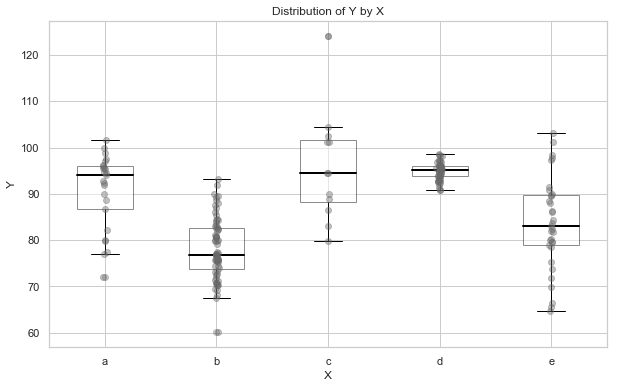

In [5]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)

labels = pd.unique(data["X"].values)
grouped_data = [grouped[ "Y"].get_group( k) for k in labels]
patch = axes.boxplot( grouped_data, labels=labels, patch_artist=True, zorder=1)
eda.restyle_boxplot( patch)

for i, k in enumerate(labels):
    subdata = grouped[ "Y"].get_group( k)
    x = np.random.normal(i + 1, 0.01, size=len(subdata))
    axes.plot(x, subdata, 'o', alpha=0.4, color="DimGray", zorder=2)

axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_title("Distribution of Y by X")
    
plt.show()
plt.close()

Here we can see the relative positions of the five subgroups created by the values of $X$. We can also see that "c" has relatively few observations. We can see that the distribution for "d" is very compact (compared to "c", especially). There's quite a bit of overlap between "b" and "e". Almost all of the values of "a" are above the median for "b" and almost above the median for "e".

With $X$ on the x-axis, we generally interpret it to be the influencer even if we're not developing a causal model. What if we think that the causality runs the other way? It would be best to flip the axes:

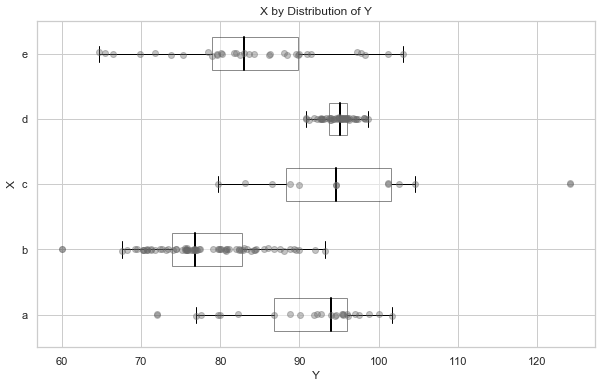

In [6]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)

labels = pd.unique(data["X"].values)
grouped_data = [grouped[ "Y"].get_group( k) for k in labels]
patch = axes.boxplot( grouped_data, labels=labels, patch_artist=True, zorder=1, vert=False)
eda.restyle_boxplot( patch)

for i, k in enumerate(labels):
    subdata = grouped[ "Y"].get_group( k)
    x = np.random.normal(i + 1, 0.01, size=len(subdata))
    axes.plot(subdata, x, 'o', alpha=0.4, color="DimGray", zorder=2)

axes.set_xlabel("Y")
axes.set_ylabel("X")
axes.set_title("X by Distribution of Y")

plt.show()
plt.close()

## Multiple Histograms

You can, of course, plot multiple histograms. In some tools, you can plot them one over the other. Our experience with visualization might suggest it's a bad idea but let's give it a try:

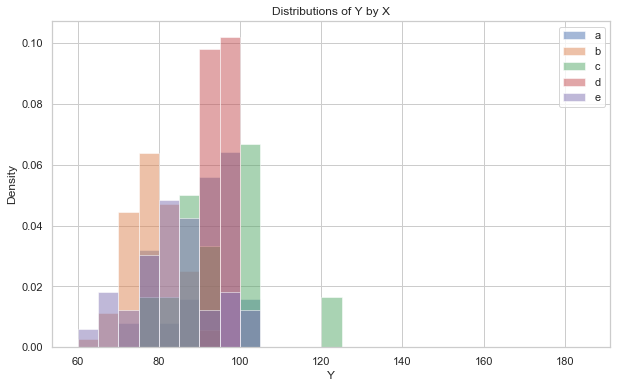

In [7]:
bins = [60 + i for i in range( 0, 130, 5)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
for k in labels:
    subdata = grouped["Y"].get_group( k).values
    axes.hist(subdata, bins=bins, density=True, alpha=0.5)

axes.legend(labels=labels)
axes.set_title("Distributions of Y by X")
axes.set_xlabel("Y")
axes.set_ylabel("Density")

plt.show()
plt.close()

That's not very good. We can change the styling a bit with "stepwise":

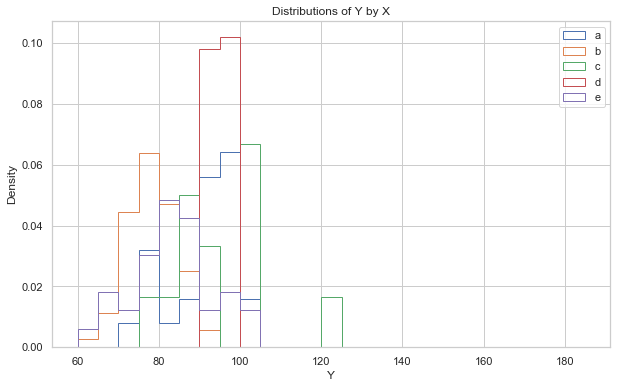

In [8]:
bins = [60 + i for i in range( 0, 130, 5)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
for k in labels:
    subdata = grouped["Y"].get_group( k).values
    axes.hist(subdata, bins=bins, density=True, histtype='step')

axes.legend(labels=labels)
axes.set_title("Distributions of Y by X")
axes.set_xlabel("Y")
axes.set_ylabel("Density")
    
plt.show()
plt.close()

This isn't better even if Seaborn would let me fix the colors. Instead we should rely on small multiples:

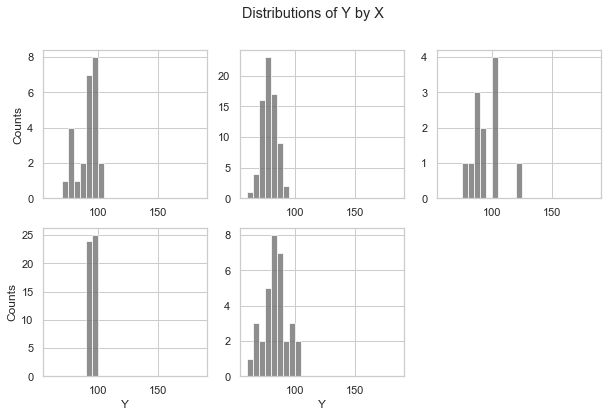

In [9]:
bins = [60 + i for i in range( 0, 130, 5)]
figure = plt.figure(figsize=(10, 6))
figure.suptitle("Distributions of Y by X")

for i, x in enumerate( labels):
    axes = figure.add_subplot(2, 3, i + 1)
    subdata = grouped["Y"].get_group(x).values
    axes.hist(subdata, bins=bins, alpha=0.75, color="DimGray")
    if (i > 2):
        axes.set_xlabel("Y")
    if (i % 3 == 0):
        axes.set_ylabel("Counts")

plt.show()
plt.close()

That's better but the scales are all different. Normally, one uses the same scale for each multiple.

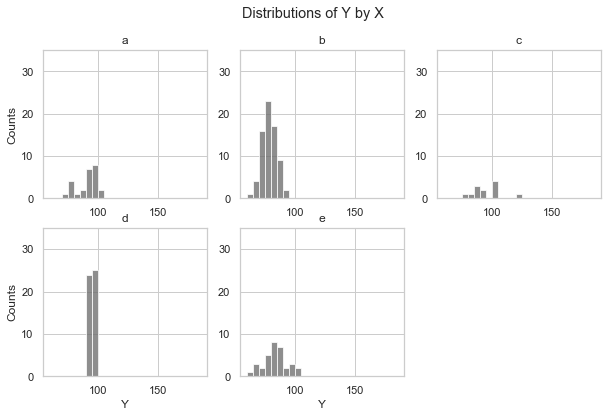

In [10]:
bins = [60 + i for i in range( 0, 130, 5)]
figure = plt.figure(figsize=(10, 6))
figure.suptitle("Distributions of Y by X")

for i, x in enumerate( labels):
    axes = figure.add_subplot(2, 3, i + 1)
    subdata = grouped["Y"].get_group(x).values
    axes.hist(subdata, bins=bins, alpha=0.75, color="DimGray")
    axes.set_title(x)
    axes.set_ylim((0,35))
    if (i > 2):
        axes.set_xlabel("Y")
    if (i % 3 == 0):
        axes.set_ylabel("Counts")

plt.show()
plt.close()

Setting the upper bounds on the y axis to the largest bin count forces the histograms for categories with fewer observations to be smaller. As before, we can switch to densities:

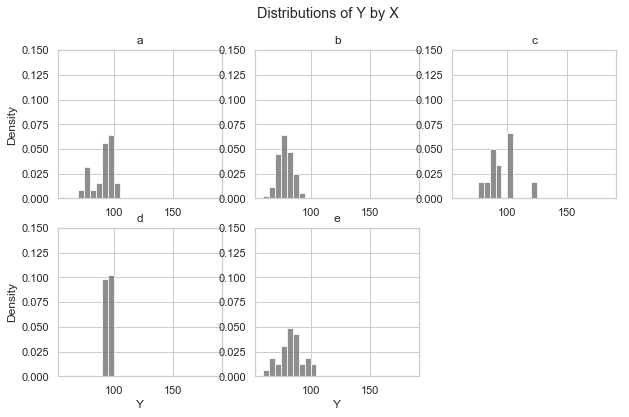

In [11]:
bins = [60 + i for i in range( 0, 130, 5)]
figure = plt.figure(figsize=(10, 6))
figure.suptitle("Distributions of Y by X")

for i, x in enumerate( labels):
    axes = figure.add_subplot(2, 3, i + 1)
    subdata = grouped["Y"].get_group(x).values
    axes.hist(subdata, bins=bins, alpha=0.75, color="DimGray", density=True)
    axes.set_title(x)
    axes.set_ylim((0,0.15))
    if (i > 2):
        axes.set_xlabel("Y")
    if (i % 3 == 0):
        axes.set_ylabel("Density")

plt.show()
plt.close()

but when we look at densities/relative frequencies, we never want to lose sight of the base counts or we may find *trivial* differences. Small multiples allow us to examine the distributional shapes for each category.